**Business Case: Enhancing Customer Experience and Driving Revenue Growth in the Cosmetics E-commerce Platform**

**Background:**
Our e-commerce platform specializes in online product sales in the cosmetics vertical. With increasing competition in the beauty industry and evolving customer preferences, it's imperative for us to stay ahead by understanding and leveraging customer behavior to enhance user experience, refine marketing strategies, and ultimately boost platform revenue.

**Problem Statement:**
Despite offering a wide range of cosmetic products, our platform faces challenges in maximizing customer engagement, increasing repeat purchases, and driving revenue growth. There is a need to derive actionable insights from customer data to address these challenges effectively.

**Objective:**
The primary objective is to analyze customer behavior and derive actionable insights to enhance user experience, refine marketing strategies, and drive revenue growth for the cosmetics e-commerce platform.


- About the Dataset:

 ● The Data Description is as follows:
- Customer ID : Unique identifier for customer
- Dateof Purchase : Date when product was purchased
- Product ID : Unique identifier for product
- Product Category: Category to which purchased product belongs
- Product Price: Selling Price of the product
- Quantity Purchased: Number of items purchased
- Purchase Amount: Total Amount paid by customer (Considering discounts and other charges)
- PaymentMethod
- Customer Age Group
- Customer City

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the tsv file
df=pd.read_csv('Shopper_Purchase_History.tsv',sep='\t')
df

,Customer Id,Date of Purchase,Product ID,Product Category,Product Price,Quantity Purchased,Purchase Amount,Payment Method,Customer Age Group,Customer City
0,f89badc759680444,2024-05-02,330862,makeup,967.0,1,870.0,NEFT,35-40,New Delhi
1,5abefaf8ec80ed04,2024-05-08,369208,hair care,299.5,2,590.0,Credit Card,25-35,Mumbai
2,6223c4f057898c1b,2024-05-02,369208,hair care,299.5,2,608.0,IMPS,40-55,Banglore
3,oXWIlw8qDxr5hopJM2,2024-05-06,369208,hair care,299.5,2,590.0,Cash on Delivery,>55,Kolkata
4,e55fc265f119c6e8,2024-05-07,369208,hair care,299.5,2,590.0,NEFT,35-40,New Delhi
...,...,...,...,...,...,...,...,...,...,...
243592,dfc9302e1019ba7a,2024-05-01,342445,makeup,422.0,10,3380.0,UPI,15-25,Pune
243593,2818da028281aab7,2024-05-01,372845,makeup,216.0,5,1025.0,Credit Card,25-35,Mumbai
243594,b7bccb25b766f292,2024-05-02,365624,hair care,260.0,2,520.0,UPI,15-25,Pune
243595,699993b0d3190983,2024-05-05,372845,makeup,216.0,2,518.0,IMPS,40-55,Banglore


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243597 entries, 0 to 243596
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer Id         243597 non-null  object 
 1   Date of Purchase    243597 non-null  object 
 2   Product ID          243597 non-null  int64  
 3   Product Category    243355 non-null  object 
 4   Product Price       243597 non-null  float64
 5   Quantity Purchased  243597 non-null  int64  
 6   Purchase Amount     243597 non-null  float64
 7   Payment Method      243597 non-null  object 
 8   Customer Age Group  243597 non-null  object 
 9   Customer City       243597 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 18.6+ MB


In [4]:
df.describe()

,Product ID,Product Price,Quantity Purchased,Purchase Amount
count,243597.000000,243597.000000,243597.000000,243597.000000
mean,327776.213595,328.208753,3.021786,731.491271
std,52753.471979,263.687477,6.507280,1243.312142
min,7438.000000,8.000000,0.000000,16.000000
25%,307565.000000,157.000000,1.000000,358.000000
50%,347864.000000,228.000000,2.000000,523.000000
75%,365656.000000,503.000000,2.000000,748.000000
max,379265.000000,12999.000000,676.000000,164660.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Customer Id', 'Date of Purchase', 'Product ID', 'Product Category',
       'Product Price', 'Quantity Purchased', 'Purchase Amount',
       'Payment Method', 'Customer Age Group', 'Customer City'],
      dtype='object')

In [7]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [8]:
df.columns

Index(['customer_id', 'date_of_purchase', 'product_id', 'product_category',
       'product_price', 'quantity_purchased', 'purchase_amount',
       'payment_method', 'customer_age_group', 'customer_city'],
      dtype='object')

In [9]:
df.date_of_purchase.unique()

array(['2024-05-02', '2024-05-08', '2024-05-06', '2024-05-07',
       '2024-05-01', '2024-05-04', '2024-05-09', '2024-05-05',
       '2024-05-03'], dtype=object)

In [10]:
df.date_of_purchase=pd.to_datetime(df.date_of_purchase)
df.dtypes

customer_id                   object
date_of_purchase      datetime64[ns]
product_id                     int64
product_category              object
product_price                float64
quantity_purchased             int64
purchase_amount              float64
payment_method                object
customer_age_group            object
customer_city                 object
dtype: object

In [12]:
df['date_of_purchase'].value_counts()

date_of_purchase
2024-05-02    49398
2024-05-01    46536
2024-05-08    28848
2024-05-04    25730
2024-05-06    24565
2024-05-05    23931
2024-05-07    21459
2024-05-03    18806
2024-05-09     4324
Name: count, dtype: int64

In [13]:
df['day_of_purchase']=df['date_of_purchase'].dt.day
df

,customer_id,date_of_purchase,product_id,product_category,product_price,quantity_purchased,purchase_amount,payment_method,customer_age_group,customer_city,day_of_purchase
0,f89badc759680444,2024-05-02,330862,makeup,967.0,1,870.0,NEFT,35-40,New Delhi,2
1,5abefaf8ec80ed04,2024-05-08,369208,hair care,299.5,2,590.0,Credit Card,25-35,Mumbai,8
2,6223c4f057898c1b,2024-05-02,369208,hair care,299.5,2,608.0,IMPS,40-55,Banglore,2
3,oXWIlw8qDxr5hopJM2,2024-05-06,369208,hair care,299.5,2,590.0,Cash on Delivery,>55,Kolkata,6
4,e55fc265f119c6e8,2024-05-07,369208,hair care,299.5,2,590.0,NEFT,35-40,New Delhi,7
...,...,...,...,...,...,...,...,...,...,...,...
243592,dfc9302e1019ba7a,2024-05-01,342445,makeup,422.0,10,3380.0,UPI,15-25,Pune,1
243593,2818da028281aab7,2024-05-01,372845,makeup,216.0,5,1025.0,Credit Card,25-35,Mumbai,1
243594,b7bccb25b766f292,2024-05-02,365624,hair care,260.0,2,520.0,UPI,15-25,Pune,2
243595,699993b0d3190983,2024-05-05,372845,makeup,216.0,2,518.0,IMPS,40-55,Banglore,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243597 entries, 0 to 243596
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         243597 non-null  object        
 1   date_of_purchase    243597 non-null  datetime64[ns]
 2   product_id          243597 non-null  int64         
 3   product_category    243355 non-null  object        
 4   product_price       243597 non-null  float64       
 5   quantity_purchased  243597 non-null  int64         
 6   purchase_amount     243597 non-null  float64       
 7   payment_method      243597 non-null  object        
 8   customer_age_group  243597 non-null  object        
 9   customer_city       243597 non-null  object        
 10  day_of_purchase     243597 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 19.5+ MB


In [15]:
for i in df:
    print(i,'----',df[i].nunique())

customer_id ---- 107796
date_of_purchase ---- 9
product_id ---- 8179
product_category ---- 11
product_price ---- 950
quantity_purchased ---- 129
purchase_amount ---- 5104
payment_method ---- 5
customer_age_group ---- 5
customer_city ---- 5
day_of_purchase ---- 9


In [16]:
df['product_category'].value_counts()

product_category
skincare         122327
makeup            62728
hair care         36865
bath and body     12281
fragrance          4849
personal care      3575
mom & baby          504
wellness            208
accessory             9
skin care             6
appliance             3
Name: count, dtype: int64

In [17]:
df.loc[df['product_category']=="skin care",'product_category']='skincare'
df['product_category'].value_counts()

product_category
skincare         122333
makeup            62728
hair care         36865
bath and body     12281
fragrance          4849
personal care      3575
mom & baby          504
wellness            208
accessory             9
appliance             3
Name: count, dtype: int64

In [18]:
df['customer_age_group'].value_counts()

customer_age_group
25-35    74108
15-25    60101
40-55    59809
35-40    30424
>55      19155
Name: count, dtype: int64

In [19]:
df['customer_city'].value_counts()

customer_city
Mumbai       74108
Pune         60101
Banglore     59809
New Delhi    30424
Kolkata      19155
Name: count, dtype: int64

In [20]:
df['payment_method'].value_counts()

payment_method
Credit Card         74108
UPI                 60101
IMPS                59809
NEFT                30424
Cash on Delivery    19155
Name: count, dtype: int64

In [21]:
df=df.dropna()
df.isnull().sum()

customer_id           0
date_of_purchase      0
product_id            0
product_category      0
product_price         0
quantity_purchased    0
purchase_amount       0
payment_method        0
customer_age_group    0
customer_city         0
day_of_purchase       0
dtype: int64

In [24]:
df_cat=df[['product_category','payment_method','customer_age_group','customer_city', 'day_of_purchase']]
df_cont=df[['product_price','quantity_purchased','purchase_amount']]

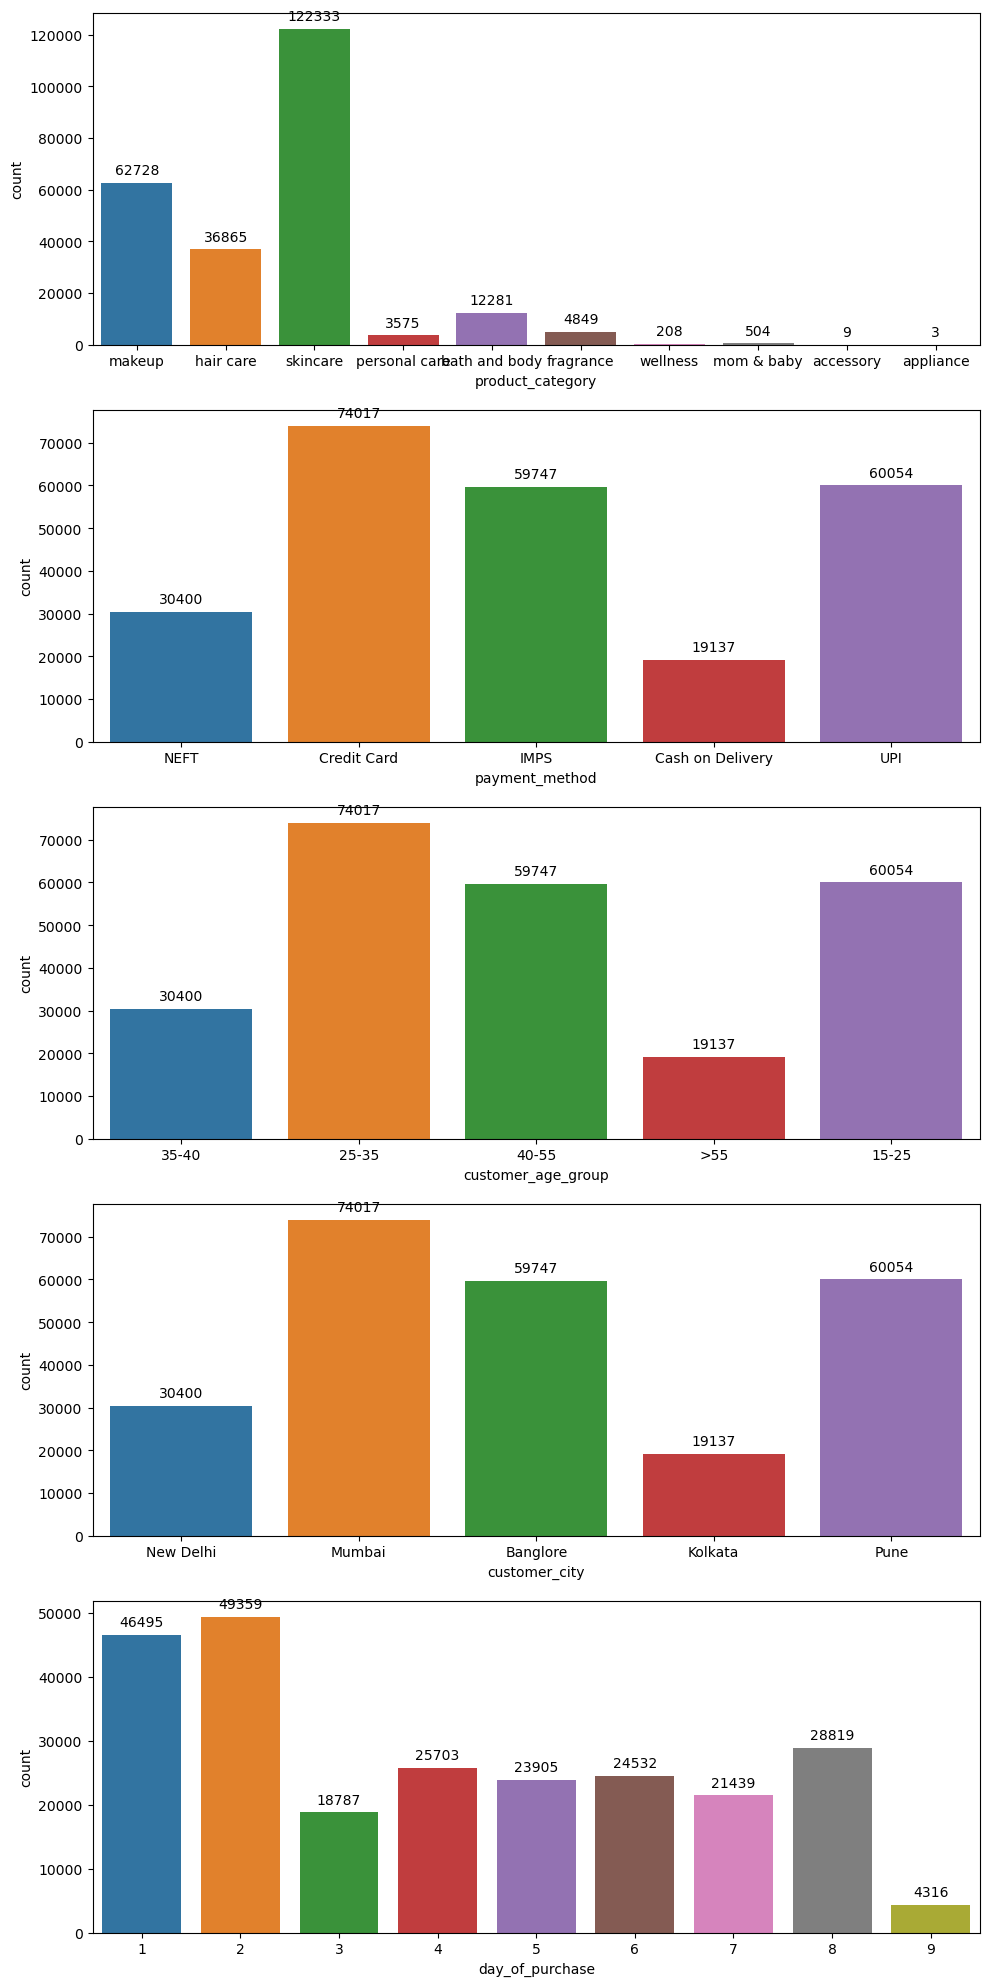

In [25]:
plt.figure(figsize=(10,20))
plotnumber = 1
for i in df_cat:
    plt.subplot(5,1,plotnumber)
    ax = sns.countplot(x=i, data=df_cat)
    
    # Adding labels to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    plotnumber += 1

plt.tight_layout()
plt.show()

## Insights:
*  Customers allocate 50.21% of their spending on skincare products, 25.75% on makeup, 15.133% on haircare, and the remaining 8.91% percentage on other products.
* Customers make payments through various methods: 30.42% use credit cards, 24.67% opt for UPI, 24.55% utilize IMPS, 12.489% choose NEFT, and 7.86% prefer cash on delivery.
* Among customers, 30.42% belong to the 25-35 age group, 24.67% fall within the 15-25 category, 24.55% are aged 40-55, 12.489% are between 35-40, and 7.86% are above 55 years old.
* Out of the total customers, 30.42% hail from Mumbai, 24.67% from Pune, 24.55% from Bangalore, 12.489% from New Delhi, and 7.86% from Kolkata.
* 39.38% of the people did shopping on 1st and 2nd day of the month

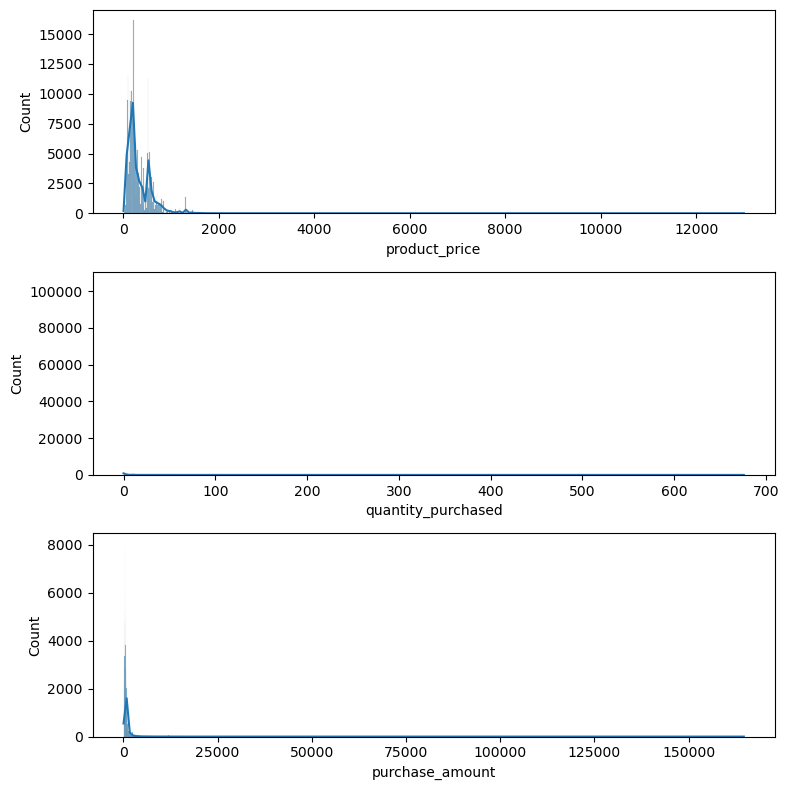

In [26]:
plt.figure(figsize=(8,8))
plotnumber=1
for i in df_cont:
    plt.subplot(3,1,plotnumber)
    sns.histplot(x=i,data=df_cont,kde=True)
    plotnumber=plotnumber+1
plt.tight_layout()

Insights:
* Most of the product_price are below 1000
* Most of the customers bill is below 5000

<Axes: xlabel='product_category', ylabel='product_price'>

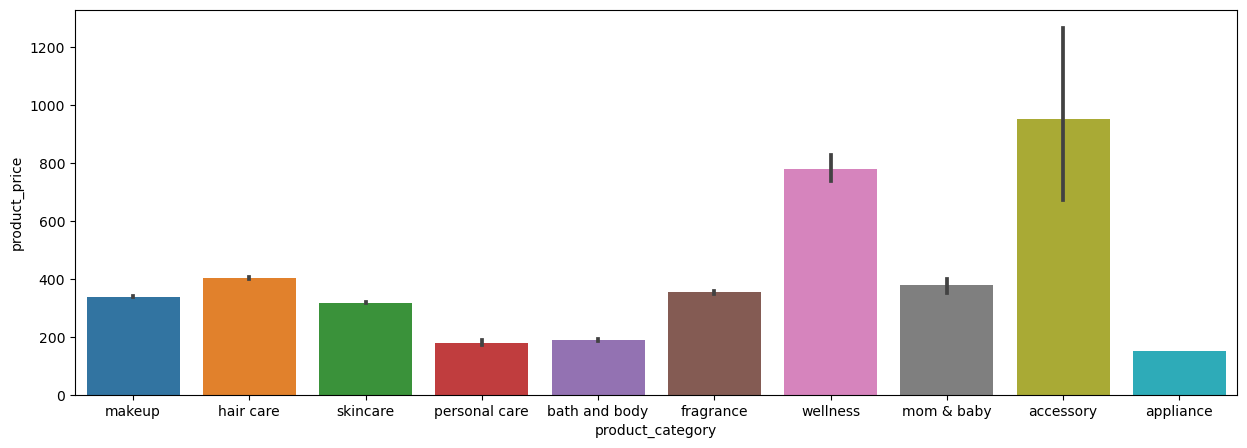

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.product_category,y=df.product_price)

* Accessory and wellness products are more expensive compared to remaining products

<Axes: xlabel='product_category', ylabel='quantity_purchased'>

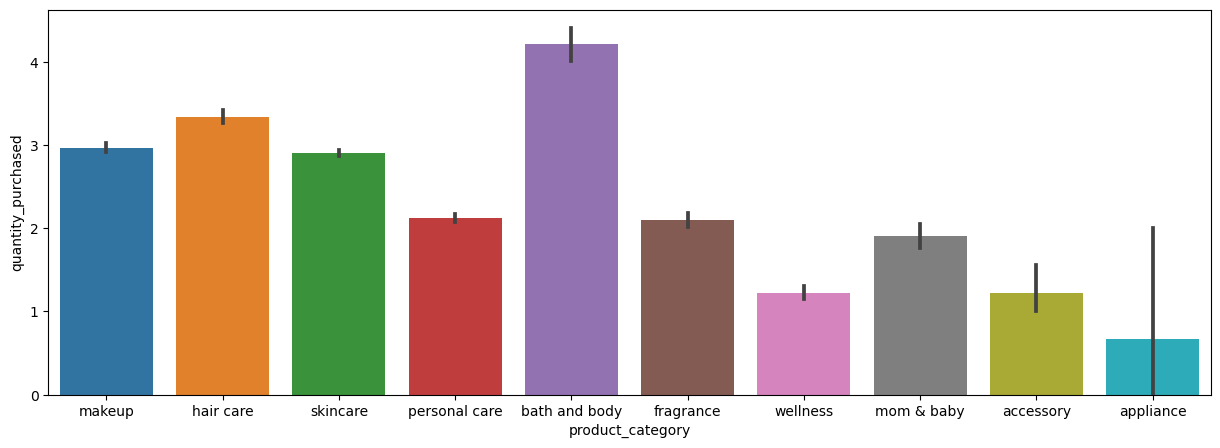

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.product_category,y=df.quantity_purchased)

* Bath and body, Hair care, make up products are selling more in number compare to remaining products
* Appliances and Wellness are least selling

<Axes: xlabel='product_price', ylabel='quantity_purchased'>

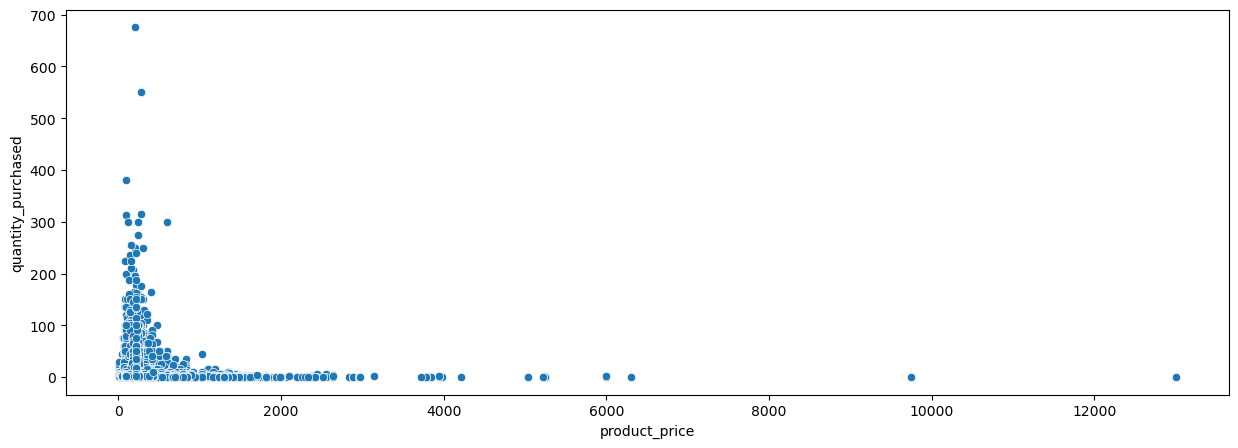

In [30]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.product_price,y=df.quantity_purchased)

* When product_price is less than 1000, more people are purchasing them. It means that most people are giving preference to the cheaper products 

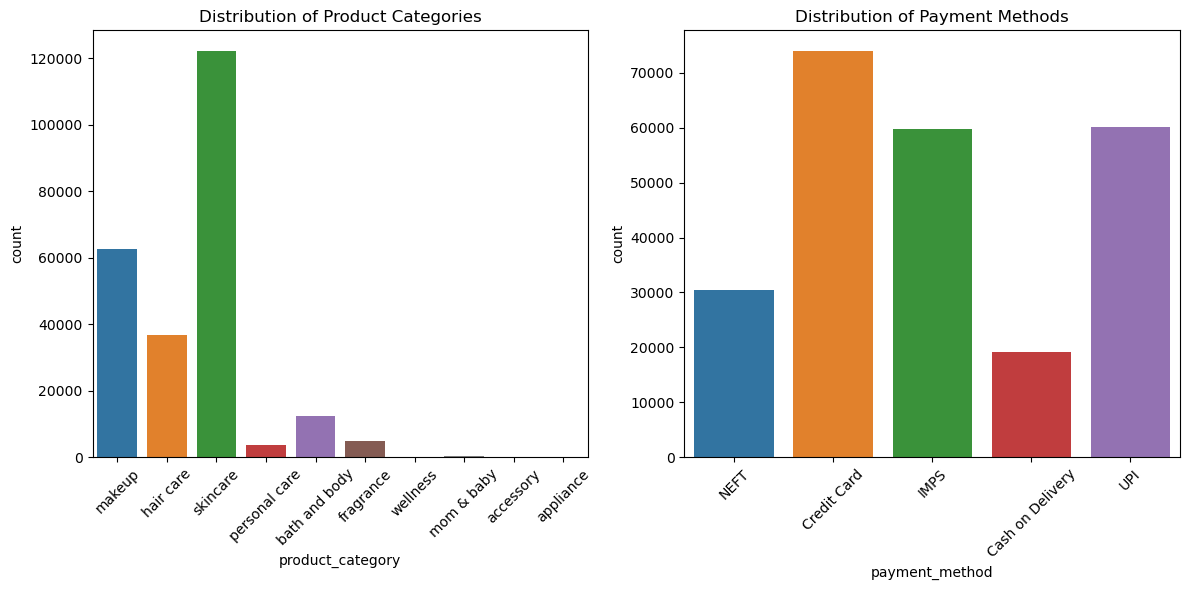

In [32]:
# Distribution of key variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='product_category')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='payment_method')
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

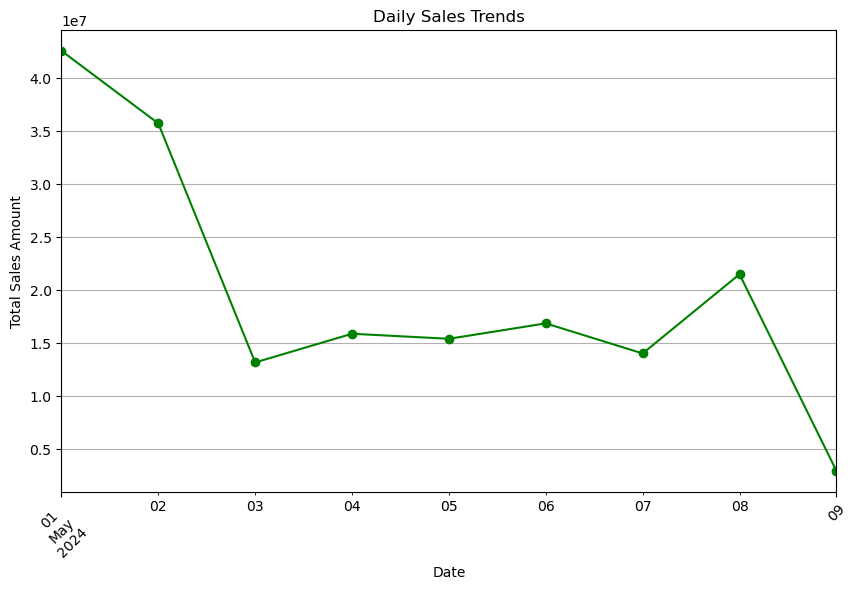

In [33]:
# Trends over time
plt.figure(figsize=(10, 6))
df1=df['date_of_purchase'].dt.to_period('D')
daily_sales = df.groupby(df1)['purchase_amount'].sum()
daily_sales.plot(marker='o', color='green')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Sales amount is highest on 1st and 2nd May i.e., most of the footfall  

In [36]:
# Average purchase frequency
avg_purchase_frequency = df.groupby('customer_id')['date_of_purchase'].count().mean()
avg_purchase_frequency

2.2590811618688673

In [38]:
# Average order value
avg_order_value = df.groupby('customer_id')['purchase_amount'].mean().mean()
avg_order_value

571.4604084498803

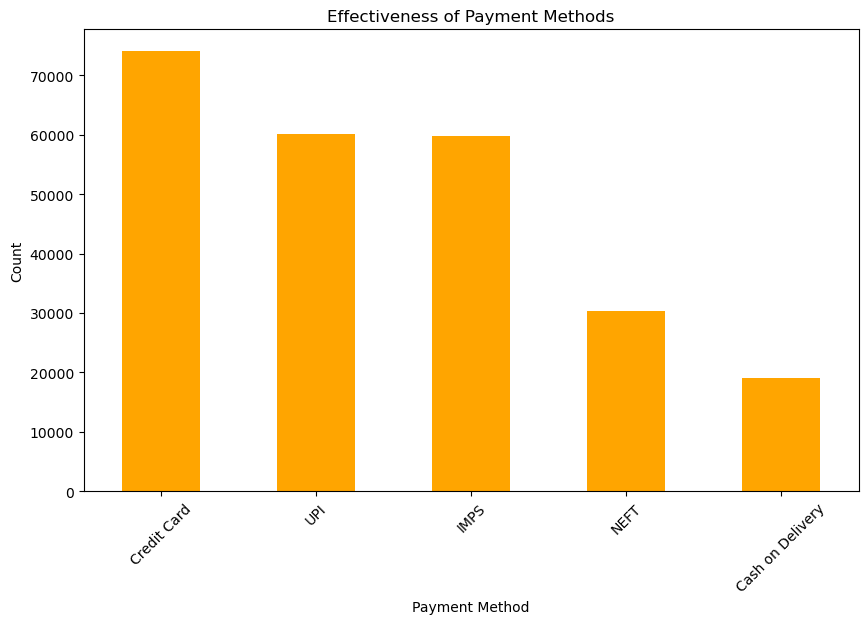

In [41]:
# Marketing Analysis
# Effectiveness of Payment Methods
plt.figure(figsize=(10, 6))
df['payment_method'].value_counts().plot(kind='bar', color='orange')
plt.title('Effectiveness of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

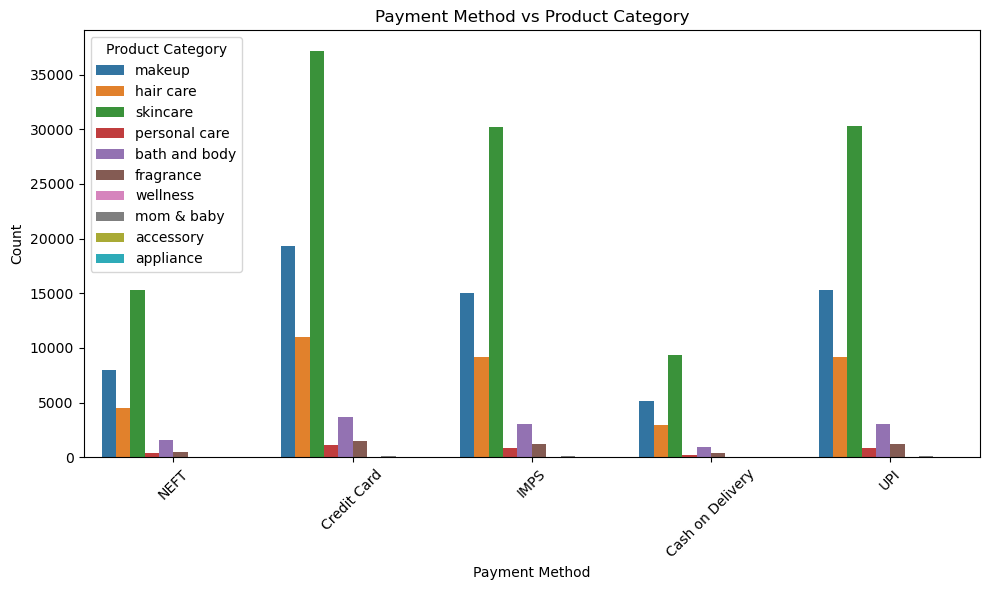

In [43]:
# Effectiveness of marketing channels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='payment_method', hue='product_category')
plt.title('Payment Method vs Product Category')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

- Most of the people used their payment methods for buying skincare products compared to others in the category.

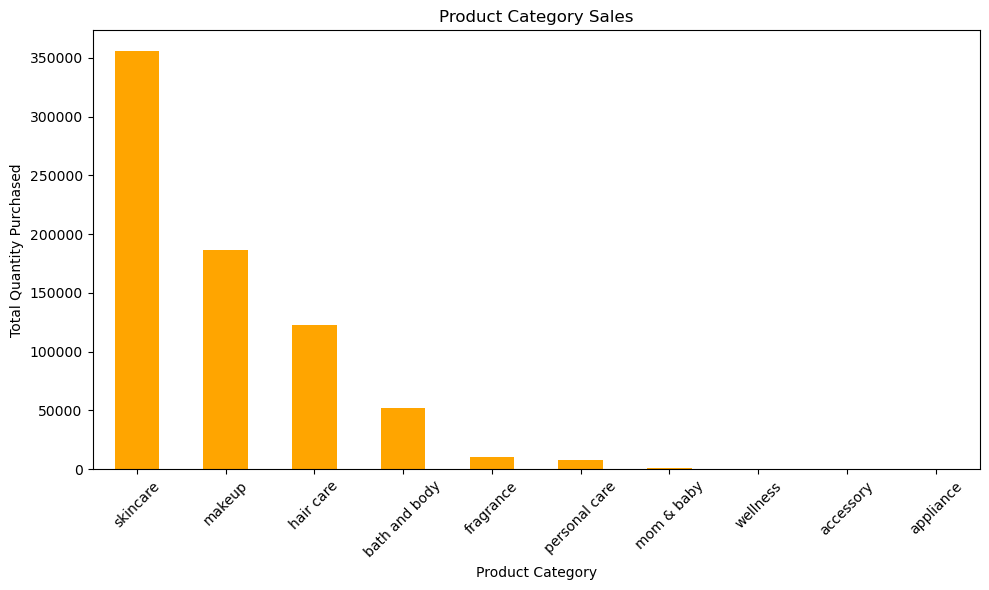

In [44]:
# Performance of product categories
plt.figure(figsize=(10, 6))
product_sales = df.groupby('product_category')['quantity_purchased'].sum().sort_values(ascending=False)
product_sales.plot(kind='bar', color='orange')
plt.title('Product Category Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# Cross-selling Opportunities
# Identify frequently co-purchased products
co_purchase_matrix = df.groupby('customer_id')['product_category'].apply(set).reset_index()
co_purchase_counts = co_purchase_matrix['product_category'].value_counts()
print("\nFrequently Co-Purchased Product Categories:")
print(co_purchase_counts.head(20))


Frequently Co-Purchased Product Categories:
product_category
{skincare}                                      46811
{makeup}                                        22382
{hair care}                                     12397
{skincare, makeup}                               5122
{bath and body}                                  3650
{skincare, hair care}                            3148
{fragrance}                                      2249
{personal care}                                  1700
{skincare, bath and body}                        1570
{skincare, hair care, makeup}                    1473
{bath and body, skincare, hair care, makeup}      991
{hair care, makeup}                               844
{skincare, bath and body, makeup}                 746
{bath and body, skincare, hair care}              518
{skincare, personal care}                         475
{fragrance, skincare}                             449
{bath and body, makeup}                           337
{bath and body, hair

Optimizing inventory management and product placement based on co-purchasing patterns involves leveraging insights from market basket analysis to make data-driven decisions. Here's how we can optimize inventory and product placement:

1. **Identify Frequently Co-Purchased Products:**
   - Conduct market basket analysis to identify products that are frequently purchased together.
   - Calculate association rules (e.g., support, confidence, lift) to determine the strength of relationships between products.

2. **Create Product Bundles or Kits:**
   - Bundle frequently co-purchased products into packages or kits.
   - Offer bundled products at a discounted price to incentivize customers to purchase multiple items together.
   - Create themed bundles based on customer preferences, occasions, or seasonal trends.

3. **Improve Product Placement:**
   - Place frequently co-purchased products in close proximity to each other in physical stores or on the website.
   - Display complementary products together to encourage cross-selling and upselling opportunities.
   - Use shelf signage, product recommendations, or suggestive selling techniques to highlight bundled products to customers.

4. **Forecast Demand and Adjust Inventory Levels:**
   - Use historical sales data and co-purchasing patterns to forecast demand for bundled products.
   - Adjust inventory levels and reorder quantities based on anticipated demand to prevent stockouts or overstocking.
   - Implement just-in-time inventory management strategies to optimize inventory turnover and reduce carrying costs.

5. **Monitor Performance and Iterate:**
   - Continuously monitor the performance of bundled products and co-purchasing patterns.
   - Analyze sales data, customer feedback, and market trends to identify opportunities for improvement.
   - Iterate on product bundles, pricing strategies, and product placement based on insights and feedback.

6. **Leverage Data Analytics and Technology:**
   - Utilize advanced analytics tools and algorithms to automate market basket analysis and generate actionable insights.
   - Invest in inventory management systems and software that integrate co-purchasing patterns and demand forecasting capabilities.
   - Leverage machine learning models to predict customer preferences and optimize product recommendations and placements dynamically.

7. **Collaborate with Suppliers and Partners:**
   - Collaborate with suppliers and partners to streamline inventory replenishment and delivery processes for bundled products.
   - Negotiate favorable terms and pricing agreements for bulk purchases or exclusive product bundles.
   - Work closely with suppliers to introduce new bundled offerings or customize existing bundles based on customer feedback and demand.

By optimizing inventory management and product placement based on co-purchasing patterns, the cosmetics e-commerce platform can enhance the customer shopping experience, increase sales, and improve operational efficiency.

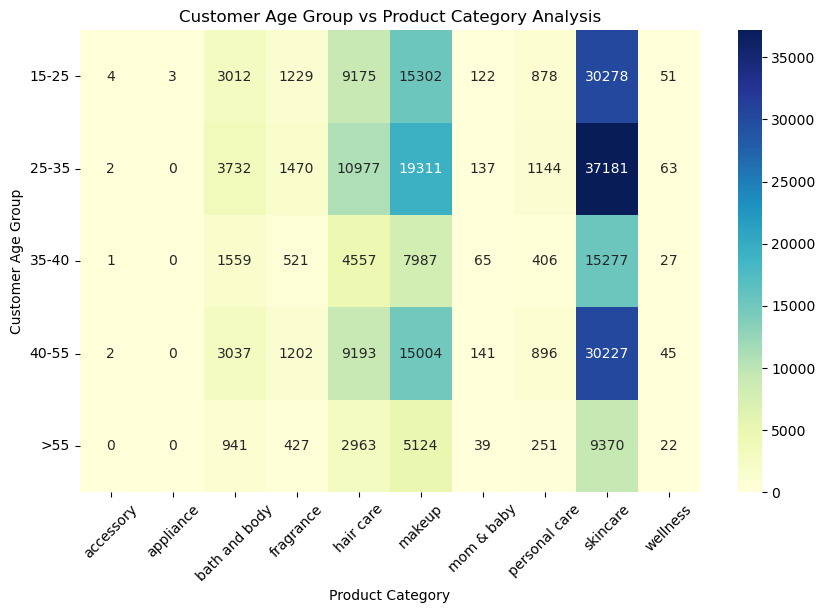

In [47]:
# Sort the data by 'Customer Age Group' and 'Product Category'
sorted_data = df.groupby(['customer_age_group', 'product_category']).size().unstack(fill_value=0)

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Customer Age Group vs Product Category Analysis')
plt.xlabel('Product Category')
plt.ylabel('Customer Age Group')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- (15-25) customer group uses 75% of skin care and makeup products compared to others.
- (25-25) customer group uses 75% of skin care and makeup products compared to others.
- (35-40) customer group uses 76.5% of skin care and makeup products compared to others.
- (40-55) customer group uses 75.7% of skin care and makeup products compared to others.
- (>55) customer group uses 89.6% of skin care and makeup products compared to others.

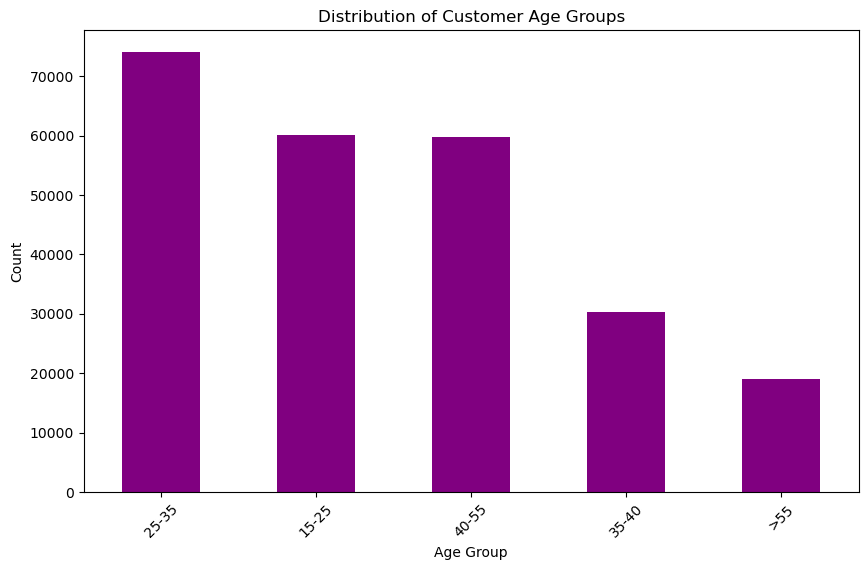

In [45]:
# Customer Age Group Analysis
plt.figure(figsize=(10, 6))
df['customer_age_group'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Customer Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- 55.55% of footfall of the customer age group lies from 15 to 35 

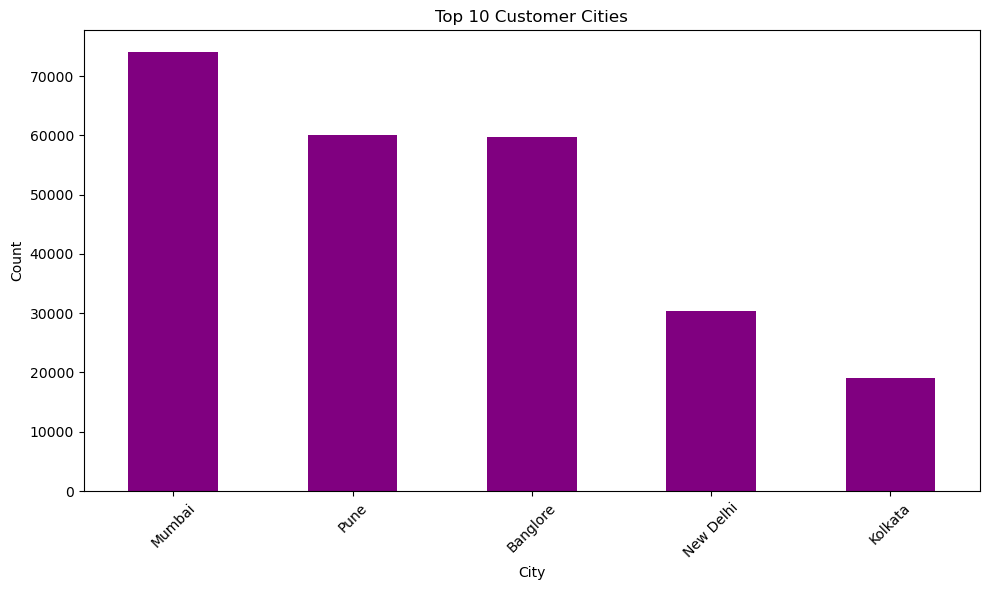

In [46]:
plt.figure(figsize=(10, 6))
top_cities = df['customer_city'].value_counts().nlargest(10)
top_cities.plot(kind='bar', color='purple')
plt.title('Top 10 Customer Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Nearly 80% of footfall of the customers are from Mumbai, Pune and Bangalore
- 55.55% of customers are from Maharastra state (Mumbai and Pune)

In [48]:
# Churn Analysis
# Calculate churn rate
churn_rate = 1 - df['customer_id'].nunique() / df['customer_id'].count()
print("\nChurn Rate:", churn_rate)


Churn Rate: 0.5573421544656982


A churn rate of 55% means that 55% of customers have stopped making purchases or have "churned" within a given time period. In other words, out of all the customers it had at the beginning of the period, 55% of them did not make any purchases during that period.

This could be concerning for e-commerce shop, as it indicates a significant portion of customer base is no longer engaging with the business. Analyzing the reasons behind this churn and implementing strategies to retain customers could be crucial for the long-term success of your shop.

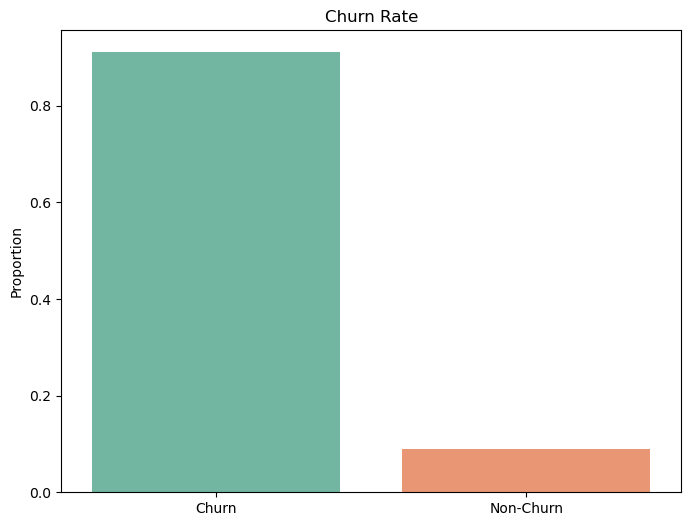

In [49]:
# Analyze customer churn rate over time
# Identify factors contributing to churn (e.g., customer demographics, purchase behavior)

# Calculate churn rate
churn_rate = df.groupby('customer_id')['date_of_purchase'].nunique().value_counts(normalize=True)[1]

# Visualize churn rate
plt.figure(figsize=(8, 6))
sns.barplot(x=['Churn', 'Non-Churn'], y=[churn_rate, 1 - churn_rate], palette='Set2')
plt.title('Churn Rate')
plt.ylabel('Proportion')
plt.show()

A churn rate of more than 80% indicates a very high level of customer attrition within a given time period. Essentially, it means that over 80% of your customers have stopped making purchases or engaging with this e-commerce shop.

Such a high churn rate can be alarming and suggests that there might be underlying issues affecting customer retention, such as dissatisfaction with products or services, poor user experience, or ineffective marketing strategies.

Addressing this high churn rate is critical for the sustainability and growth of this e-commerce business. Need to conduct a thorough analysis to identify the root causes of churn and implement targeted measures to improve customer retention, enhance customer satisfaction, and encourage repeat purchases.

In [52]:
# Customer Lifetime Value (CLV) Analysis
# Calculate CLV for each customer
clv = df.groupby('customer_id')['purchase_amount'].sum()

# Sort customers based on CLV in descending order
top_customers = clv.sort_values(ascending=False).head(20)

# Print top customers with highest CLV
print("Top Customers with Highest CLV:")
print(top_customers)

Top Customers with Highest CLV:
customer_id
da2e9c4e0315b4d2      585180.00
35bd83071c9bb79b      545181.00
93a68a19ccc94ccf      522163.00
876eb386e21856c6      442269.00
2b1fe69a54d25723      439773.00
335660da7b070296      410473.00
4ed4d0f65e83ea2e      380822.00
03e54f25c77d90d1      374225.00
69062fce1bf16c2a      363367.00
526c2f98b11ce6ec      355808.00
6d27672e3f057874      329493.00
df9be915db639d3f      322536.00
40961bbbd76c63f2      299379.99
dfc9302e1019ba7a      283488.00
dda7dedb3c526d43      267696.00
18c1294d661d6532      264777.00
s7FpcdjVaXlG95cbhJ    264400.00
861b606de5fbcace      256463.00
f42ecef33e61b348      255137.00
zvFqivXBPtjXJCgv4d    226542.00
Name: purchase_amount, dtype: float64


* By identifying these high-value customers with the highest CLV, the cosmetics e-commerce platform can focus on retaining and engaging these customers through personalized marketing efforts, loyalty programs, and special offers, thereby maximizing their long-term value to the business.

* Tailoring retention strategies and loyalty programs to retain and engage high-value customers involves understanding their preferences, behavior, and motivations. Here's how you can customize retention strategies and loyalty programs for high-value customers:

1. **Personalized Communications:**
   - Send personalized emails or messages addressing high-value customers by their name.
   - Tailor communications based on their past purchases, preferences, and browsing history.
   - Highlight exclusive offers, rewards, or promotions specifically designed for them.

2. **VIP Treatment:**
   - Offer VIP benefits such as early access to new products, exclusive discounts, or priority customer service.
   - Provide dedicated account managers or support representatives for high-value customers to address their inquiries or concerns promptly.

3. **Loyalty Programs:**
   - Create tiered loyalty programs with escalating rewards based on customer spending levels.
   - Offer bonus points, cashback, or special discounts for high-value customers for every purchase they make.
   - Provide rewards for non-transactional activities such as referrals, social media engagement, or completing surveys.

4. **Exclusive Events and Experiences:**
   - Organize exclusive events, previews, or workshops for high-value customers.
   - Offer invitations to VIP-only sales events, product launches, or private shopping sessions.
   - Provide opportunities for high-value customers to interact with brand ambassadors or influencers.

5. **Customized Product Recommendations:**
   - Use personalized recommendation engines to suggest products based on high-value customers' purchase history and preferences.
   - Offer curated product bundles or subscription services tailored to their specific needs or interests.

6. **Surprise and Delight:**
   - Surprise high-value customers with unexpected rewards, gifts, or personalized thank-you notes.
   - Acknowledge important milestones such as birthdays, anniversaries, or the anniversary of their first purchase with special offers or discounts.

7. **Feedback and Engagement:**
   - Solicit feedback from high-value customers to understand their satisfaction levels, preferences, and areas for improvement.
   - Engage them in product development or beta testing initiatives to make them feel valued and involved in the brand's evolution.

8. **Continuous Engagement:**
   - Maintain regular communication with high-value customers through targeted marketing campaigns, newsletters, or social media interactions.
   - Keep them updated on new product releases, promotions, or loyalty program benefits to encourage ongoing engagement and repeat purchases.

By implementing these tailored retention strategies and loyalty programs, the cosmetics e-commerce platform can foster stronger relationships with high-value customers, enhance their loyalty and satisfaction, and ultimately drive long-term revenue growth.

Focusing on increasing customer loyalty and encouraging repeat purchases is crucial for maximizing Customer Lifetime Value (CLV). Here's how you can prioritize strategies to achieve this goal:

1. **Enhance Customer Experience:**
   - Provide a seamless and user-friendly online shopping experience.
   - Offer multiple payment options, easy navigation, and quick checkout processes.
   - Provide excellent customer service and support to address any issues or concerns promptly.

2. **Build Emotional Connections:**
   - Foster emotional connections with customers through storytelling, brand values, and shared experiences.
   - Communicate the brand's mission, values, and commitment to customer satisfaction.
   - Create engaging content and social media campaigns that resonate with customers on a personal level.

3. **Implement Loyalty Programs:**
   - Launch a tiered loyalty program with rewards, perks, and exclusive benefits for repeat customers.
   - Offer incentives such as points, discounts, cashback, or freebies for every purchase made.
   - Encourage customers to earn and redeem points for future purchases, fostering a sense of value and appreciation.

4. **Personalize Marketing Communications:**
   - Segment customers based on their preferences, purchase history, and behavior.
   - Deliver personalized marketing messages, product recommendations, and offers tailored to each customer segment.
   - Use data-driven insights to anticipate customer needs and proactively engage them with relevant content and promotions.

5. **Offer Incentives for Repeat Purchases:**
   - Provide incentives for repeat purchases, such as loyalty points multipliers, bonus rewards, or limited-time discounts for returning customers.
   - Implement automated email campaigns to remind customers of past purchases and encourage them to replenish or repurchase products.

6. **Engage Customers Through Omnichannel Experiences:**
   - Create a seamless omnichannel experience across online platforms, mobile apps, social media, and physical stores (if applicable).
   - Allow customers to shop, interact, and engage with the brand across multiple channels, providing consistency and convenience.

7. **Solicit Feedback and Act on Insights:**
   - Regularly solicit feedback from customers through surveys, reviews, and feedback forms.
   - Act on customer feedback to address pain points, improve product offerings, and enhance the overall customer experience.
   - Demonstrate responsiveness and a commitment to continuous improvement to build trust and loyalty.

8. **Reward Advocacy and Referrals:**
   - Encourage satisfied customers to become brand advocates and refer friends or family members.
   - Incentivize referrals with rewards or discounts for both the referrer and the new customer, fostering a sense of community and belonging.

By focusing on increasing customer loyalty and driving repeat purchases through these strategies, the cosmetics e-commerce platform can maximize CLV, strengthen customer relationships, and sustain long-term growth and profitability. Let me know if you need further assistance or have any other questions!

**Proposed Solution:**
By conducting an extensive analysis of the purchase history dataset, we aim to:

1. **Segment Customers:** Utilize clustering techniques to segment customers based on their purchasing behavior, demographics, and geographic location. This will help in personalizing marketing efforts and tailoring product offerings to meet the diverse needs of different customer segments.

2. **Customer Lifetime Value (CLV) Analysis:** Calculate CLV for each customer to identify high-value customers with the highest potential for long-term revenue generation. By focusing on retaining and engaging these high-value customers through loyalty programs and personalized marketing strategies, we can maximize CLV and drive revenue growth.

3. **Market Basket Analysis:** Analyze co-purchasing patterns to identify frequently co-purchased products. This insight will be used to create product bundles, optimize inventory management, and improve product placement to increase cross-selling opportunities and average order value.

4. **Customer Satisfaction Analysis:** Perform sentiment analysis on customer feedback to understand overall satisfaction levels and identify areas for improvement. By addressing customer concerns and enhancing the overall shopping experience, we can increase customer loyalty and encourage repeat purchases.

5. **Optimize Marketing Strategies:** Analyze the effectiveness of different marketing channels and campaigns in driving conversions. By allocating marketing budgets to the most impactful channels and refining messaging based on customer preferences, we can improve ROI and maximize revenue.

**Expected Outcomes:**
- Improved customer segmentation and personalized marketing efforts leading to higher engagement and conversion rates.
- Increased customer retention and loyalty through targeted loyalty programs and enhanced customer experience.
- Optimization of inventory management and product placement resulting in higher average order value and revenue growth.
- Enhanced marketing strategies and improved ROI through data-driven decision-making and optimization.

**Conclusion:**
By leveraging data-driven insights and implementing targeted strategies, we can enhance user experience, drive customer loyalty, and ultimately achieve revenue growth for the cosmetics e-commerce platform. This comprehensive approach will position us as a leader in the competitive beauty industry and ensure long-term success in meeting customer needs and expectations.